In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.stats import gaussian_kde
from sklearn.cluster import DBSCAN

In [7]:
data_path ='http://cs.joensuu.fi/sipu/datasets/spiral.txt'

In [8]:
data = pd.read_table(data_path, sep='\s+', header=None)
data.head()

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [21]:
data.describe()

,0,1,2
count,312.000000,312.000000,312.000000
mean,18.408173,16.344712,2.016026
std,7.299923,6.867232,0.815682
min,3.000000,2.900000,1.000000
25%,12.912500,11.337500,1.000000
50%,18.325000,16.050000,2.000000
75%,23.400000,21.362500,3.000000
max,31.950000,31.650000,3.000000


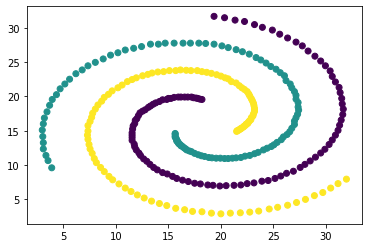

In [11]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,2])
plt.show()

In [15]:
d_mat = pairwise_distances(X=data.iloc[:,:2])

In [16]:
d_mat

array([[ 0.        ,  1.03077641,  1.98494332, ..., 17.47512518,
        17.56680107, 17.60433185],
       [ 1.03077641,  0.        ,  0.95524866, ..., 16.98683314,
        17.09064071, 17.13300908],
       [ 1.98494332,  0.95524866,  0.        , ..., 16.63730747,
        16.75298481, 16.8000744 ],
       ...,
       [17.47512518, 16.98683314, 16.63730747, ...,  0.        ,
         0.25      ,  0.35      ],
       [17.56680107, 17.09064071, 16.75298481, ...,  0.25      ,
         0.        ,  0.1       ],
       [17.60433185, 17.13300908, 16.8000744 , ...,  0.35      ,
         0.1       ,  0.        ]])

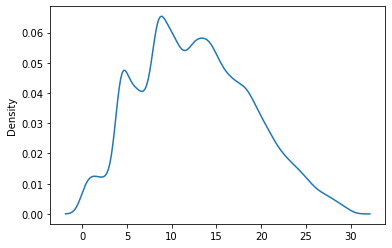

In [22]:
sns.kdeplot(d_mat.flatten())

In [32]:
kde = gaussian_kde(d_mat.flatten())


In [45]:
x_vals = np.linspace(1,2, num=100)

In [46]:
x_densities = kde(x_vals)

In [47]:
max(x_densities)

0.012461255808507344

In [48]:
eps_radius = x_vals[x_densities==max(x_densities)]

In [49]:
eps_radius

array([1.37373737])

In [51]:
d_mat_bool = d_mat<= eps_radius

In [52]:
pts_within_eps =d_mat_bool.sum(axis=0)

(array([  3.,   0.,   0., 107.,   0.,   0.,   0.,  18.,   0.,   0.,  73.,
          0.,   0.,   0.,  16.,   0.,   0.,  34.,   0.,   0.,   0.,  13.,
          0.,   0.,   0.,  11.,   0.,   0.,   7.,   0.,   0.,   0.,   4.,
          0.,   0.,   5.,   0.,   0.,   0.,   4.,   0.,   0.,   8.,   0.,
          0.,   0.,   7.,   0.,   0.,   2.]),
 array([ 2.  ,  2.28,  2.56,  2.84,  3.12,  3.4 ,  3.68,  3.96,  4.24,
         4.52,  4.8 ,  5.08,  5.36,  5.64,  5.92,  6.2 ,  6.48,  6.76,
         7.04,  7.32,  7.6 ,  7.88,  8.16,  8.44,  8.72,  9.  ,  9.28,
         9.56,  9.84, 10.12, 10.4 , 10.68, 10.96, 11.24, 11.52, 11.8 ,
        12.08, 12.36, 12.64, 12.92, 13.2 , 13.48, 13.76, 14.04, 14.32,
        14.6 , 14.88, 15.16, 15.44, 15.72, 16.  ]),
 <a list of 50 Patch objects>)

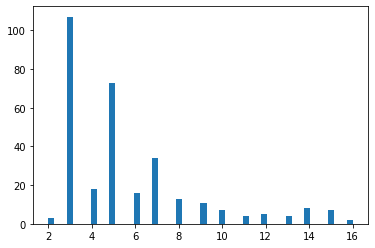

In [54]:
plt.hist(pts_within_eps, bins=50)

In [73]:
minpts=3

In [74]:
dbs = DBSCAN(eps=eps_radius, min_samples=minpts)

In [75]:
dbs.fit(data.iloc[:,:2])

DBSCAN(algorithm='auto', eps=array([1.37373737]), leaf_size=30,
       metric='euclidean', metric_params=None, min_samples=3, n_jobs=None,
       p=None)

In [76]:
clust=dbs.fit_predict(data.iloc[:,:2])
clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

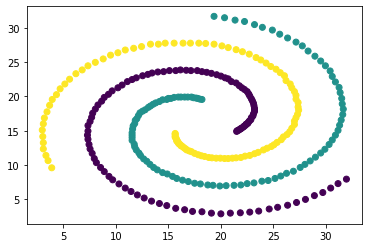

In [77]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=clust)
plt.show()

#When the dataset is large

Try to take a sample size of 5000 and find from that rius and min points and then use that for DBScan
DBScan is scalable by use of kde tree, all tree etc.
It makes DBScan mor scalable compared to hierarchical clustering

#Issues
1) Finding radius and minpoints is time consuming
2) Imagine If there are three cllusters and 2 are dense and one not dense . If we choose radius and minpoints according to dense cluster, then the not dense custer points would be taken as outliers
3) The outliers should be seperated and on that the algorithm should be run again using diff radius and min points (check end of video 17)



#Doubts
How to ensure all clusters are formed since we can't visualize (tsne?)
